In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
df=pd.read_excel('eordata.xlsx')

df.head(5)

,Number,Country,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,1,USA,40,7100,22,20,153.0,1,Polmer
1,2,USA,33,5250,40,1,135.0,50,Polmer
2,3,USA,16,7900,30,3,150.0,75,Polmer
3,4,USA,550,700,35,6,80.0,64,Polmer
4,5,USA,471,4010,15,75,150.0,62,Polmer


In [24]:
df.drop('Number', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.head(5)

,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,40,7100,22,20,153.0,1,Polmer
1,33,5250,40,1,135.0,50,Polmer
2,16,7900,30,3,150.0,75,Polmer
3,550,700,35,6,80.0,64,Polmer
4,471,4010,15,75,150.0,62,Polmer


In [25]:
df.describe()

,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation
count,463.000000,463.000000,463.000000,4.630000e+02,457.000000,463.000000
mean,1388.494600,3765.827214,25.788337,1.511113e+04,121.119256,60.611231
std,1955.373648,2958.532222,11.900131,2.324802e+05,43.023422,16.069790
min,0.000000,33.000000,8.000000,0.000000e+00,5.000000,1.000000
25%,30.000000,1400.000000,13.000000,1.000000e+00,100.000000,50.000000
50%,500.000000,2900.000000,26.000000,1.700000e+01,106.000000,60.000000
75%,2000.000000,5400.000000,37.000000,1.952000e+03,133.000000,70.500000
max,11500.000000,18500.000000,57.000000,4.990000e+06,325.000000,98.000000


In [26]:
df.nunique()

Permeability , md    177
Depth , ft           192
Gravity , °API        42
Viscosity , cp       119
Temprature , °F      105
Saturation            67
Observed               8
dtype: int64

In [27]:
df[df['Observed']=='combution'].shape

(19, 7)

In [28]:
X = df.to_numpy()


y = X[:, -1]
X = X[:, :-1]

In [29]:
X.shape

(463, 6)

In [30]:
X

array([[40, 7100, 22, 20, 153.0, 1],
       [33, 5250, 40, 1, 135.0, 50],
       [16, 7900, 30, 3, 150.0, 75],
       ...,
       [3500, 475, 19, 1200, nan, 65],
       [2000, 2100, 12, 900, nan, 15],
       [1500, 1350, 14, 3350, nan, 48]], shape=(463, 6), dtype=object)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
mean=X_train.mean(axis=0)
std=np.std(X_train, axis=0,dtype='float64')
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

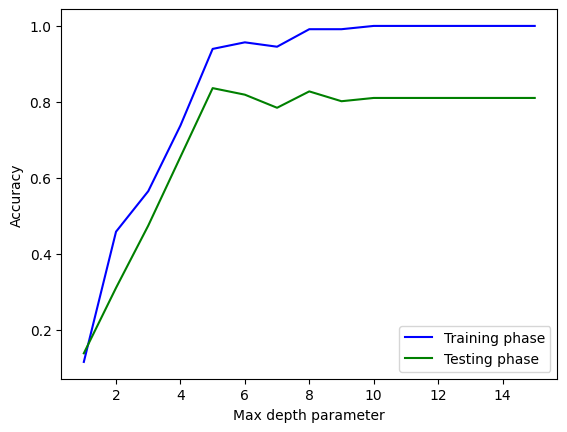

In [33]:
train_scores = []
test_scores = []
for d in range(1, 16):
    clf = DecisionTreeClassifier(max_depth=d, criterion='entropy', random_state=2, class_weight='balanced')
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 16, 1), np.array(train_scores), 'b-', label='Training phase')
plt.plot(np.arange(1, 16, 1), np.array(test_scores), 'g-',label='Testing phase')
plt.xlabel('Max depth parameter')
plt.ylabel('Accuracy')
plt.legend()

In [34]:
clf = DecisionTreeClassifier(max_depth=9, criterion='entropy', random_state=2, class_weight='balanced')
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  9
train accuracy :  0.9913544668587896
test accuracy :  0.8017241379310345


In [55]:
SIRI=np.array([[157, 9500, 33.9, 0.57, 220,86]])

In [57]:
SIRI_N=(SIRI-mean)/std

In [59]:
clf.predict(SIRI_N)

array(['Hydrocarbon'], dtype=object)